# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Siti Chairini
- **Email:** sitichairini2003@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada Jam Berapa Jam Puncak dan Sepi Penyewaan Sepeda?
- Pertanyaan 2 : Bagaimana performa penjualan perusahaan selama beberapa tahun terakhir?
- Pertanyaan 3 : Lebih banyak orang yang mendaftar sebagai anggota atau lebih suka menyewa sepeda secara sekali pakai?

## Import Semua Packages/Library yang Digunakan

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [20]:
# Membaca file CSV yang berisi data tabel 'day'
day_df = pd.read_csv("day.csv")

# Menampilkan lima baris pertama dari dataset 'day_df'
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
# Membaca file CSV yang berisi data tabel 'hour'
hour_df = pd.read_csv("hour.csv")

# Menampilkan lima baris pertama dari dataset 'hour_df'
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [22]:
# Memeriksa tipe data dari setiap kolom dalam dataframe 'hour_df'
hour_df.info()

# Memeriksa tipe data dari setiap kolom dalam dataframe 'day_df'
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [23]:
# Memeriksa jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset 'hour_df'
hour_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Memeriksa jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset 'day_df'
day_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
# Memeriksa jumlah baris duplikat dalam dataset 'hour_df'
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# Memeriksa jumlah baris duplikat dalam dataset 'day_df'
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [24]:
# Memeriksa parameter statistik dari kolom-kolom numerik yang ada di dataset 'day_df'
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Memeriksa parameter statistik dari kolom-kolom numerik yang ada di dataset 'hour_df'
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dropping

In [26]:
# Menghapus kolom 'workingday' dari dataframe 'hour_df' dan 'day_df'
# Saya berpendapat bahwa kolom 'workingday' sudah diwakili oleh 'weekday',
# dan kolom 'instant' tidak relevan
hour_df.drop(['workingday'], axis=1, inplace=True)
day_df.drop(['workingday'], axis=1, inplace=True)

In [27]:
# Mengubah tipe data dari int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', dan 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] = day_df[column].astype("category")  # Mengubah tipe data di 'day_df'
    hour_df[column] = hour_df[column].astype("category")  # Mengubah tipe data di 'hour_df'

In [29]:
# Menangani tipe data pada kolom 'dteday' yang awalnya berformat 'object' dengan mengubahnya menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Mengubah tipe data di 'day_df'
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # Mengubah tipe data di 'hour_df'

Rename

In [30]:
# Mengubah nama kolom agar lebih mudah dibaca dalam dataset 'day_df'
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}, inplace=True)


In [31]:
# Mengubah nama kolom agar lebih mudah dibaca dalam dataset 'hour_df'
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hours',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}, inplace=True)

In [32]:
# Mengubah nilai dalam kolom agar lebih mudah dipahami
# Mengubah 'season' menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
hour_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

# Mengubah 'month' menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                     ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)
hour_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                      ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)

# Mengubah 'weather_situation' menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
day_df.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow'), inplace=True)
hour_df.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light_RainSnow', 'Heavy_RainSnow'), inplace=True)

# Mengubah 'one_of_week' menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.one_of_week.replace((0, 1, 2, 3, 4, 5, 6),
                           ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)
hour_df.one_of_week.replace((0, 1, 2, 3, 4, 5, 6),
                            ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)

# Mengubah 'year' menjadi: 0:2011, 1:2012
day_df.year.replace((0, 1), ('2011', '2012'), inplace=True)
hour_df.year.replace((0, 1), ('2011', '2012'), inplace=True)

# Menghitung nilai 'humidity'
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100


<ipython-input-32-1f33837f683f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
<ipython-input-32-1f33837f683f>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 

In [33]:
# Menambahkan kolom baru bernama 'category_days' untuk menunjukkan apakah hari termasuk weekend atau weekdays
one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def get_category_days(day):
    if day in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

# Menerapkan fungsi untuk membuat kolom 'category_days' pada hour_df dan day_df
hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [34]:
# Fungsi untuk mengklasifikasikan kelembapan berdasarkan nilai kelembapan yang diberikan
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif 45 <= humidity < 65:
        return "Ideal"
    else:
        return "Terlalu lembab"

# Menerapkan fungsi untuk menambahkan kolom 'humidity_category' pada hour_df dan day_df
hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

In [35]:
# Menampilkan ringkasan statistik dari dataset hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Dari data yang kita miliki, terlihat bahwa layanan penyewaan sepeda ini cukup populer, dengan total pelanggan mencapai 17.379 orang. Jika dilihat dari waktu penyewaan, puncak keramaian terjadi sekitar pukul 11.54 siang. Ini berarti, banyak pelanggan yang memilih untuk menyewa sepeda di sekitar waktu tersebut.

Namun, perlu diingat bahwa waktu penyewaan sepeda ini cukup bervariasi. Ada pelanggan yang menyewa di pagi hari, siang hari, sore hari, bahkan malam hari. Hal ini menunjukkan bahwa layanan ini cukup fleksibel dan dapat memenuhi kebutuhan berbagai jenis pelanggan.

In [36]:
# Menghitung total penyewaan berdasarkan jam
hour_df.groupby("hours").agg({
    "count_cr": "sum"
})

,count_cr
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


"Berdasarkan analisis pivot table, kita dapat menyimpulkan bahwa jam sibuk bagi layanan penyewaan sepeda adalah sekitar pukul 17.00, sementara jam sepi terjadi pada pukul 04.00. Hal ini menunjukkan bahwa sebagian besar pelanggan cenderung menyewa sepeda untuk kegiatan sore hari atau malam hari."

## Exploratory Data Analysis (EDA)

### Explore ...

In [37]:
# Melihat ringkasan statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


"Berdasarkan data statistik, total pelanggan yang tercatat pada musim 1 hingga 4 mencapai 17.379 orang."

In [38]:
# Melihat total penyewaan setiap tahun berdasarkan kategori registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Data menunjukkan perbedaan yang signifikan antara jumlah anggota dan non-anggota, dengan anggota yang terdaftar sejak tahun 2011 mencapai angka 995.851 orang, jauh lebih tinggi dibandingkan dengan non-anggota yang berjumlah 247.252 orang.

Berdasarkan visualisasi data, terlihat jelas bahwa minat masyarakat untuk menyewa sepeda pada hari libur nasional (tanggal merah) cenderung lebih rendah dibandingkan dengan hari biasa. Analisis data mengungkapkan bahwa program keanggotaan sangat efektif dalam menarik pelanggan, dengan jumlah anggota yang jauh melampaui non-anggota. Di sisi lain, data juga menunjukkan bahwa hari libur nasional cenderung mengurangi minat masyarakat untuk menyewa sepeda."

Dengan jumlah anggota yang mencapai 995.851 orang pada tahun 2011, program keanggotaan terbukti sangat sukses dalam mempertahankan pelanggan setia. Namun, data juga menunjukkan fluktuasi dalam permintaan, dengan penurunan yang signifikan pada hari libur nasional. Hal ini mengindikasikan bahwa faktor-faktor seperti hari kerja dan hari libur memiliki pengaruh yang cukup besar terhadap perilaku penyewaan sepeda.

### Convert dteday data type

In [39]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [40]:
day_df.head()


,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Terlalu lembab
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Terlalu lembab
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Terlalu kering
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Ideal
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Terlalu kering


Correct the values of season, weekday and month variables

In [41]:
# Menggunakan kolom 'dteday' yang berisi data tanggal untuk menghasilkan nama hari (Senin, Selasa, dll.).
# Fungsi dt.day_name() digunakan untuk mendapatkan nama hari dari tiap tanggal.
# Hasilnya disimpan dalam kolom baru 'weekday', yang menunjukkan nama hari dari setiap tanggal.
day_df['weekday'] = day_df['dteday'].dt.day_name()

In [42]:
day_df.head(3)

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category,weekday
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Terlalu lembab,Saturday
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Terlalu lembab,Sunday
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Terlalu kering,Monday


In [43]:
# Mengambil nama bulan dari kolom 'dteday' yang berisi tanggal.
# Fungsi dt.month_name() digunakan untuk mendapatkan nama bulan dari setiap tanggal.
# Hasilnya disimpan dalam kolom baru 'mnth', yang menunjukkan bulan terkait dengan setiap tanggal.
day_df['mnth'] = day_df['dteday'].dt.month_name()

In [44]:
day_df.head(3)

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category,weekday,mnth
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Terlalu lembab,Saturday,January
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Terlalu lembab,Sunday,January
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Terlalu kering,Monday,January


In [47]:
# Kode ini mengganti nilai integer pada kolom 'season' dengan nama musim yang sesuai.
# Fungsi find_season() digunakan untuk memetakan angka 1 hingga 4 ke nama musim: 'Winter', 'Spring', 'Summer', dan 'Fall'.
# DataFrame 'day_df' disalin menjadi 'df', lalu nama musim ditambahkan ke dalam daftar 'season_list'.
# Melalui loop, nilai musim diubah dan diperbarui dalam kolom 'season' di DataFrame.
import pandas as pd  # Mengimpor pustaka pandas

def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

df = day_df.copy()  # Membuat salinan day_df ke df

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)

df['season'] = season_list


In [42]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


Correct the values of yr variable

In [48]:
df['yr'] = df['dteday'].dt.year

In [49]:
df.head(3)

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category,weekday,mnth,yr
0,1,2011-01-01,None,2011,Jan,0,Saturday,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Terlalu lembab,Saturday,January,2011
1,2,2011-01-02,None,2011,Jan,0,Sunday,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Terlalu lembab,Sunday,January,2011
2,3,2011-01-03,None,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Terlalu kering,Monday,January,2011


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Jam Berapa Jam Puncak dan Sepi Penyewaan Sepeda?

In [ ]:
# Mengelompokkan data berdasarkan jam dan menghitung total penyewaan
sum_order_items_df = hour_df.groupby("hours").agg({"count_cr": "sum"}).sort_values(by="count_cr", ascending=False).reset_index()

<ipython-input-36-4cb5b80e6539>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#FFC107", "#FFC107", "#4CAF50", "#FFC107", "#FFC107"], ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.

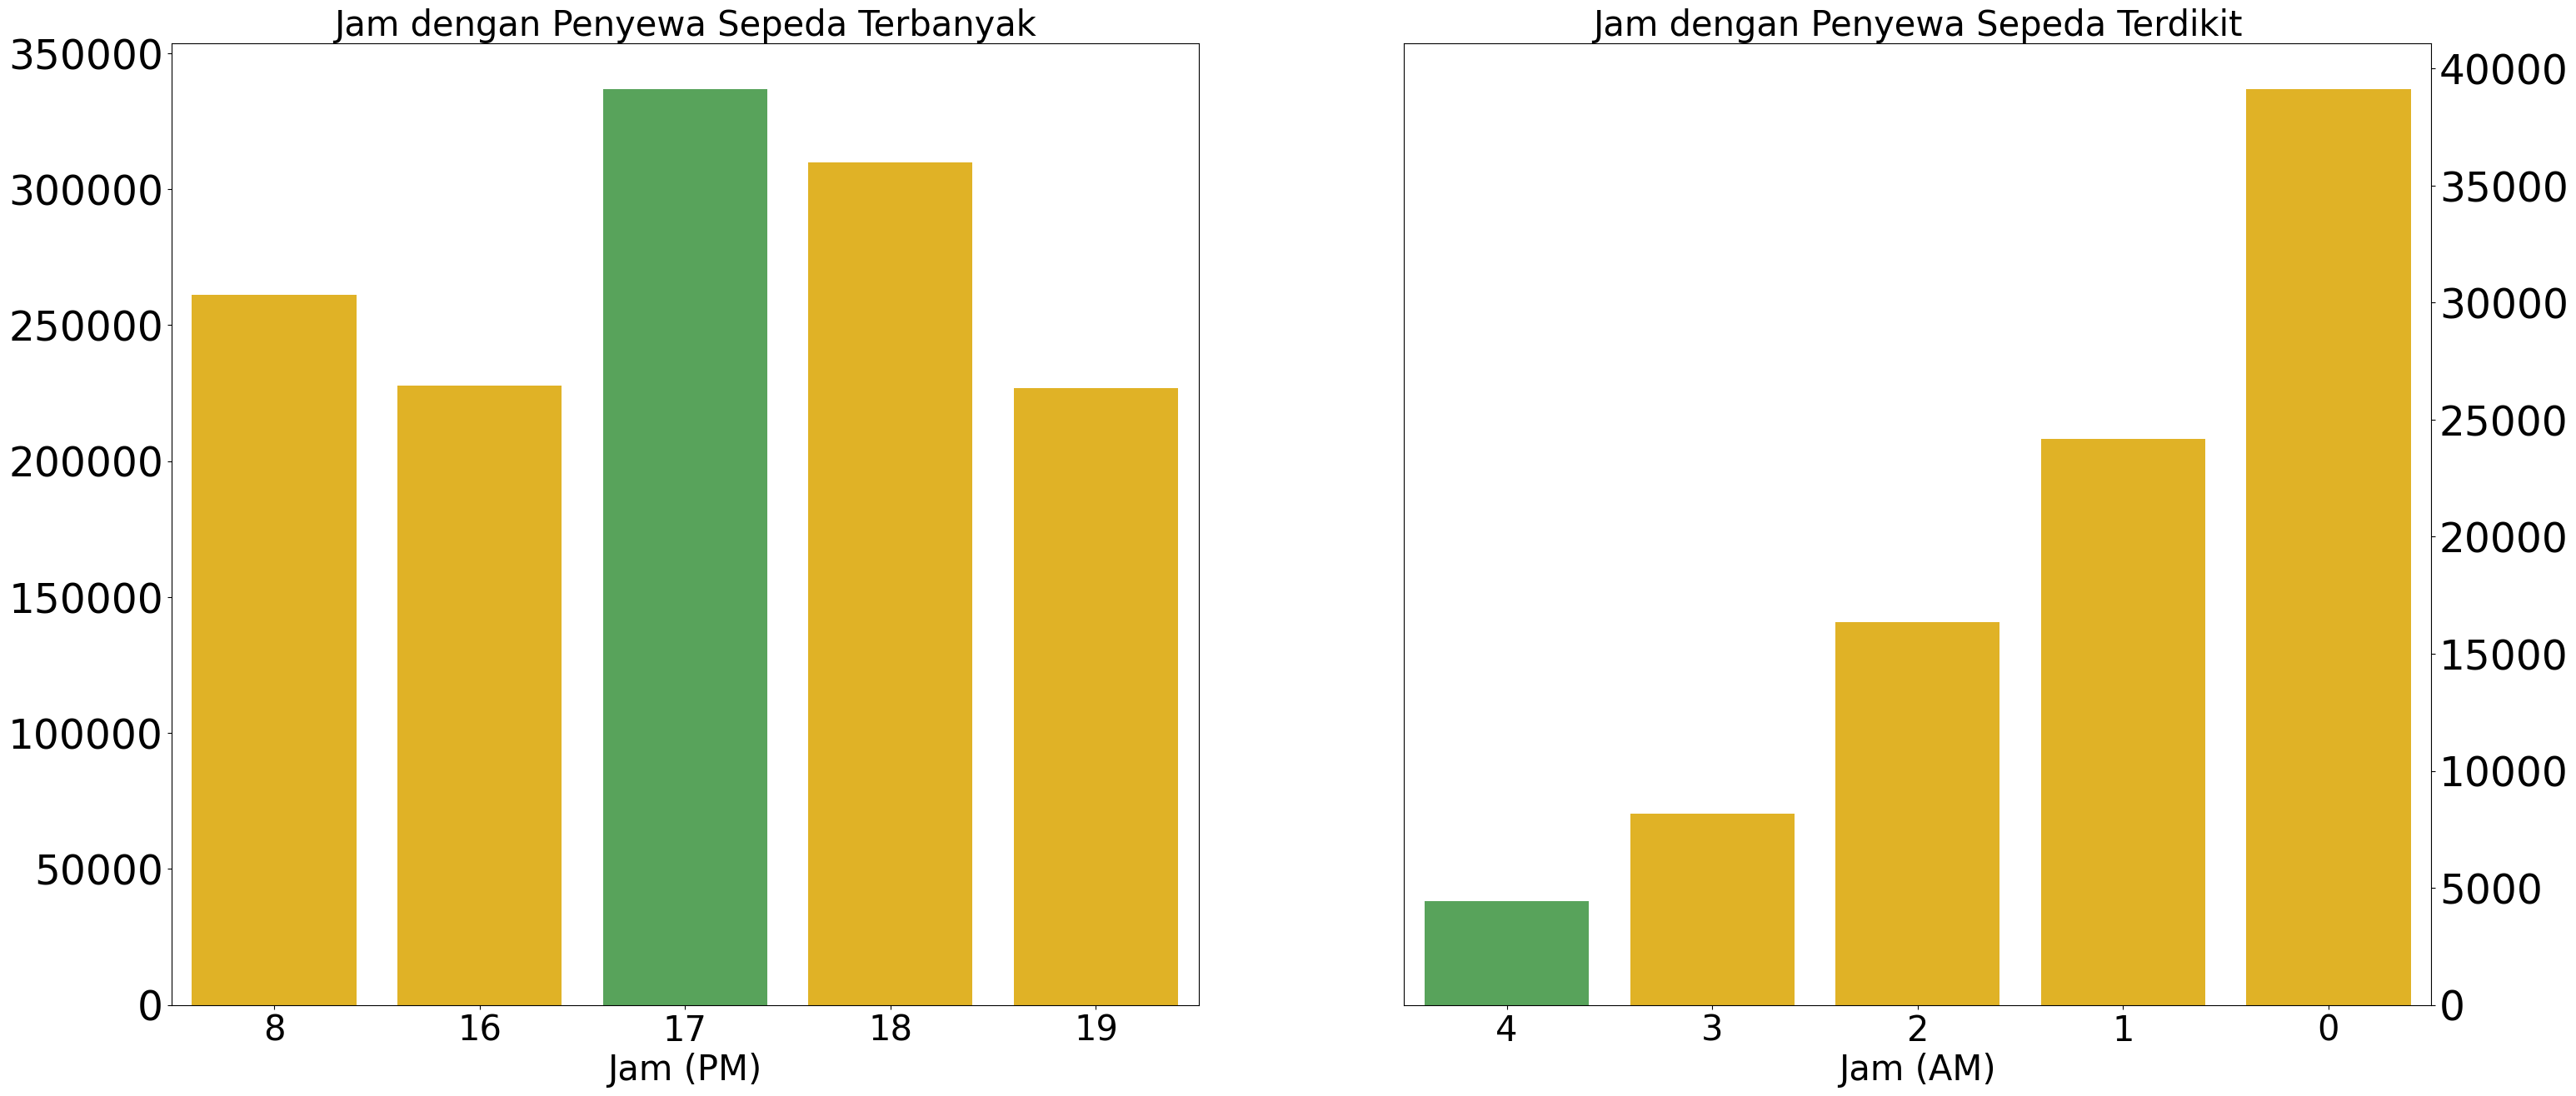

In [ ]:
# Membuat grafik batang untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Membuat grafik batang untuk jam dengan penyewa sepeda terbanyak
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#FFC107", "#FFC107", "#4CAF50", "#FFC107", "#FFC107"], ax=ax[0])

# Mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jam (PM)", fontsize=30)
ax[0].set_title("Jam dengan Penyewa Sepeda Terbanyak", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# Membuat grafik batang untuk jam dengan penyewa sepeda terdikit
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#FFC107", "#FFC107", "#FFC107", "#FFC107", "#4CAF50"], ax=ax[1])

# Mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam (AM)", fontsize=30)
ax[1].set_title("Jam dengan Penyewa Sepeda Terdikit", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menampilkan grafik
plt.show()


"Ternyata, pengguna sepeda paling sering menyewa sepeda pada sore hari sekitar pukul 5 (17:00) dengan jumlah mencapai ratusan ribu kali. Di sisi lain, dini hari pukul 4 (04:00) menjadi waktu yang paling jarang dipilih untuk menyewa sepeda, dengan jumlah yang jauh lebih sedikit."


### Pertanyaan 2: Bagaimana performa penjualan perusahaan selama beberapa tahun terakhir?

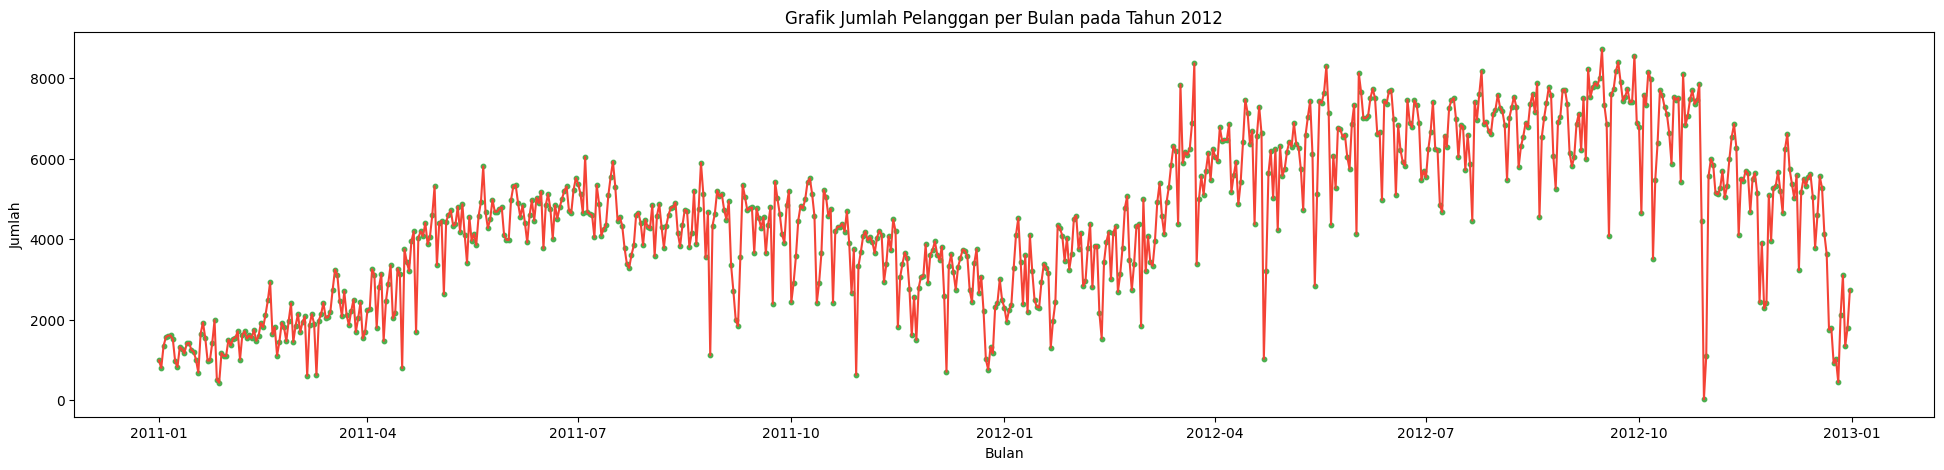

In [ ]:
# Membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# Membuat scatter plot untuk jumlah pelanggan maksimum per bulan dengan warna hijau dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#4CAF50", s=10, marker='o')  # Warna hijau

# Membuat line plot untuk jumlah pelanggan maksimum per bulan dengan warna merah
plt.plot(monthly_counts.index, monthly_counts.values, color="#F44336")  # Warna merah

# Menambahkan label untuk sumbu x
plt.xlabel('Bulan')

# Menambahkan label untuk sumbu y
plt.ylabel('Jumlah')

# Menambahkan judul
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# Menampilkan plot
plt.show()


"Analisis visualisasi data menunjukkan bahwa puncak permintaan terjadi pada bulan September. Selanjutnya, terdapat tren penurunan yang signifikan pada jumlah pesanan mulai dari bulan November hingga Desember."


### Pertanyaan 3: Lebih banyak orang yang mendaftar sebagai anggota atau lebih suka menyewa sepeda secara sekali pakai?

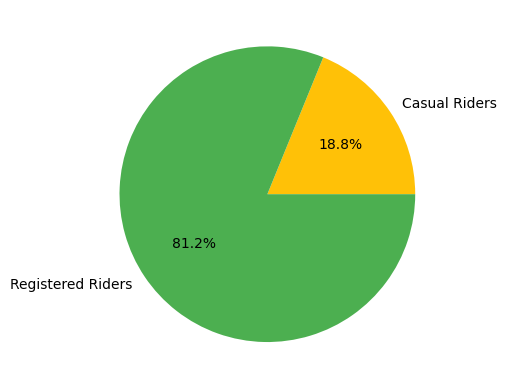

In [61]:
# Menghitung jumlah total pengguna kasual
total_casual = sum(day_df['casual'])

# Menghitung jumlah total pengguna terdaftar
total_registered = sum(day_df['registered'])

# Menyiapkan data untuk pie chart
data = [total_casual, total_registered]
labels = ['Casual Riders', 'Registered Riders']

# Membuat pie chart dengan warna tertentu
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#FFC107", "#4CAF50"])

# Menampilkan pie chart
plt.show()


Sebagian besar pengguna layanan berbagi sepeda adalah pengguna terdaftar (registered riders) yang mencapai 81.2% dari total penggunaan, menunjukkan bahwa mayoritas pengguna lebih memilih untuk mendaftar sebelum menggunakan layanan. Sementara itu, hanya 18.8% pengguna yang termasuk dalam kategori casual riders, atau mereka yang belum mendaftar.

## Analisis Lanjutan (Opsional)

1. Analisis Univariat

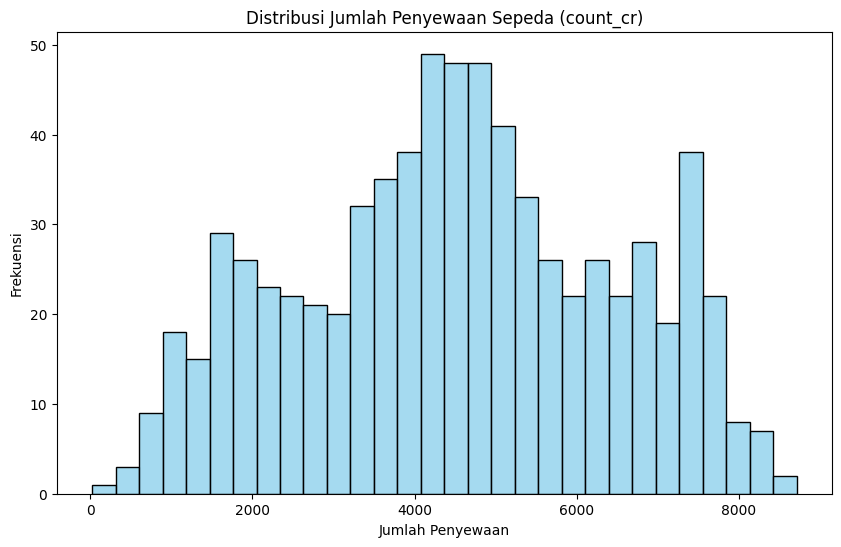

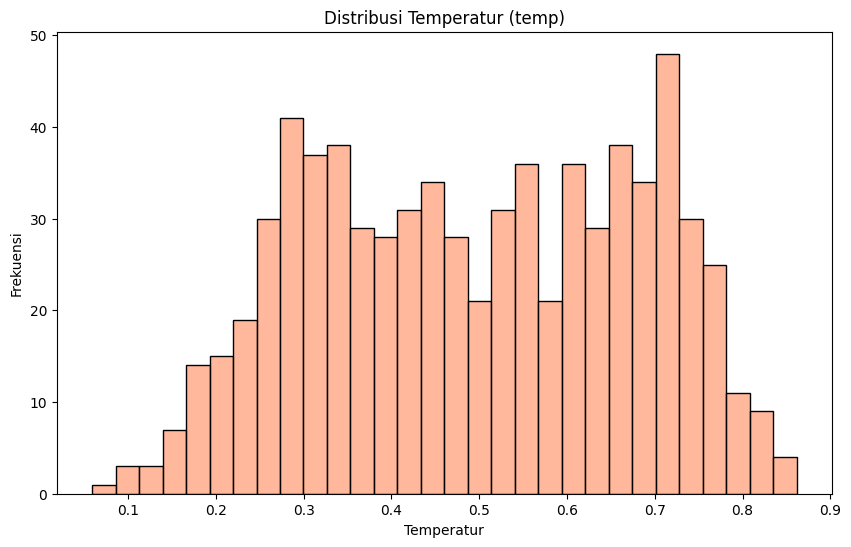

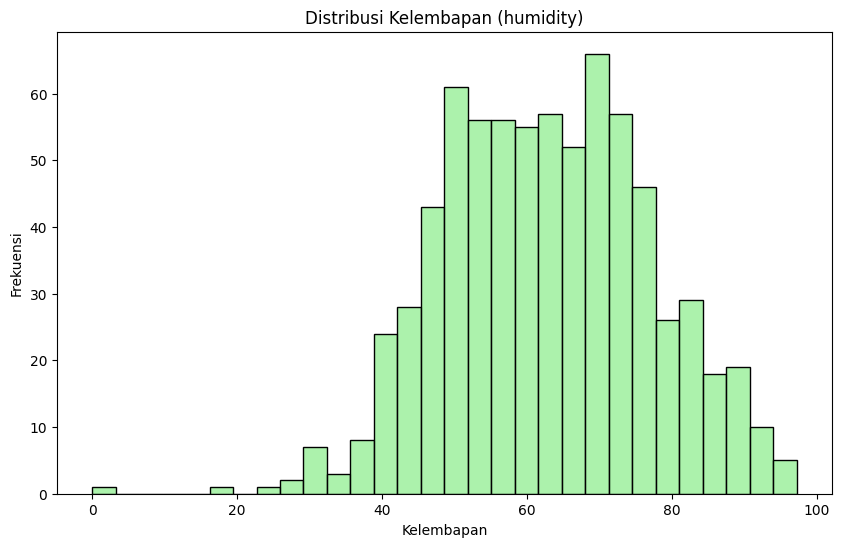

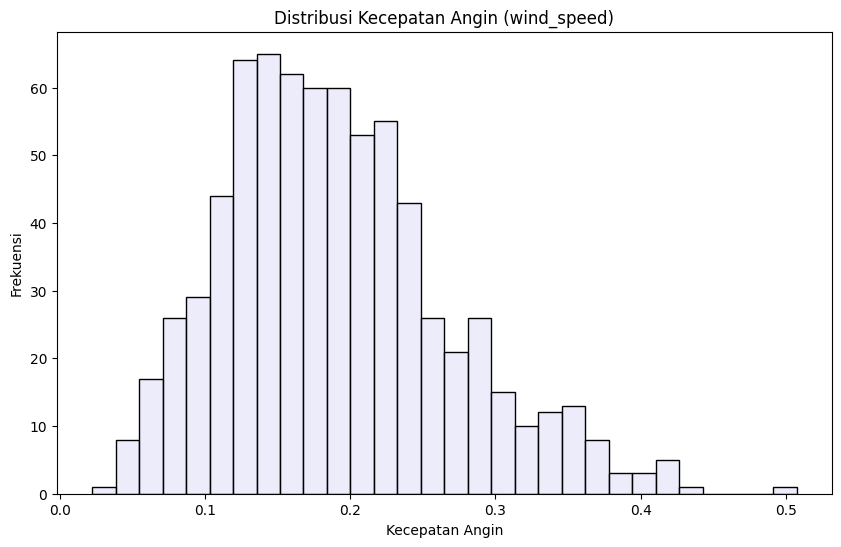

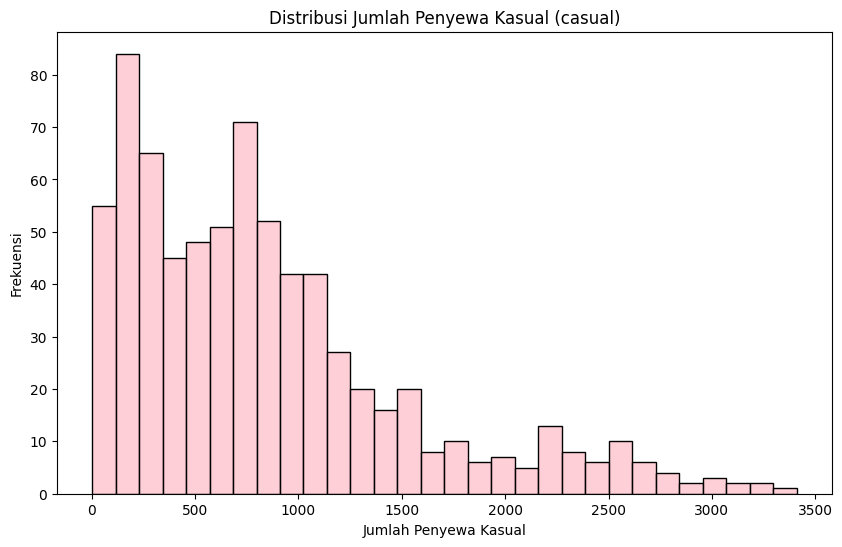

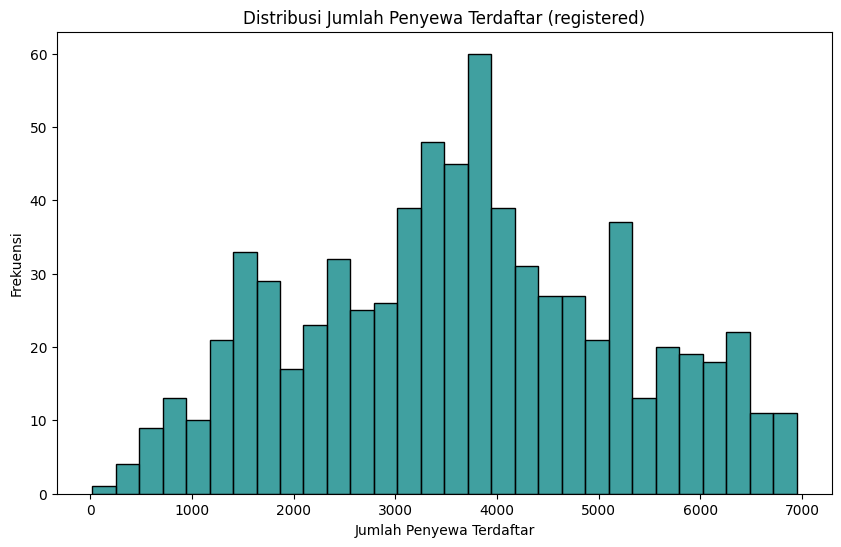

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk 'count_cr'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['count_cr'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Penyewaan Sepeda (count_cr)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'temp'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], bins=30, kde=False, color='lightsalmon', edgecolor='black')
plt.title('Distribusi Temperatur (temp)')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'humidity'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['humidity'], bins=30, kde=False, color='lightgreen', edgecolor='black')
plt.title('Distribusi Kelembapan (humidity)')
plt.xlabel('Kelembapan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'wind_speed'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['wind_speed'], bins=30, kde=False, color='lavender', edgecolor='black')
plt.title('Distribusi Kecepatan Angin (wind_speed)')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'casual'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['casual'], bins=30, kde=False, color='pink', edgecolor='black')
plt.title('Distribusi Jumlah Penyewa Kasual (casual)')
plt.xlabel('Jumlah Penyewa Kasual')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'registered'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['registered'], bins=30, kde=False, color='teal', edgecolor='black')
plt.title('Distribusi Jumlah Penyewa Terdaftar (registered)')
plt.xlabel('Jumlah Penyewa Terdaftar')
plt.ylabel('Frekuensi')
plt.show()


2. Analisis Clustering

In [ ]:
# Menghitung jumlah penyewa unik berdasarkan situasi cuaca
unique_rentals_by_weather = hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)

# Menampilkan hasil
print(unique_rentals_by_weather)

weather_situation
Clear             848
Misty             649
Light_RainSnow    368
Heavy_RainSnow      3
Name: count_cr, dtype: int64


<ipython-input-41-ae7c95067e80>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_rentals_by_weather = hour_df.groupby(by="weather_situation").count_cr.nunique().sort_values(ascending=False)


In [62]:
# Menghitung jumlah penyewa berdasarkan kategori kelembaban
humidity_counts = hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]
})

# Menampilkan hasil
print(humidity_counts)


                  count_cr
                     count
humidity_category         
Ideal                 5505
Terlalu kering        3518
Terlalu lembab        8356


2. RFM Analysis
Analisis RFM adalah sebuah alat yang sangat berguna untuk memahami pelanggan. Dengan menganalisis tiga faktor utama yaitu Recency (kebaruan transaksi), Frequency (frekuensi transaksi), dan Monetary (nilai transaksi), kita bisa membuat kelompok-kelompok pelanggan yang berbeda.

In [66]:
# Mengambil tanggal maksimum dari kolom dteday
current_date = max(hour_df['dteday'])

# Menghitung RFM
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency: menghitung selisih hari dari tanggal terakhir penyewaan
    'instant': 'count',  # Frequency: menghitung jumlah penyewaan
    'count_cr': 'sum'  # Monetary: menghitung total penyewaan
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Menampilkan 5 data teratas
print(rfm_df.head())


   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


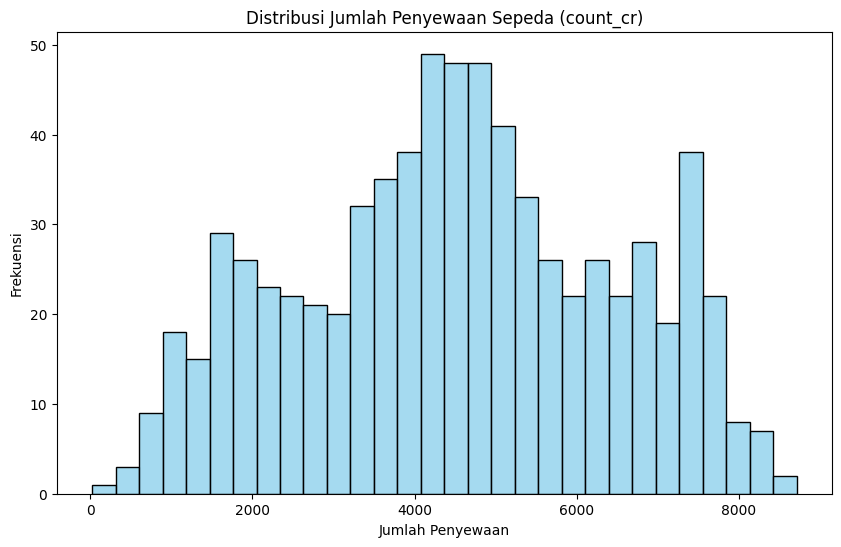

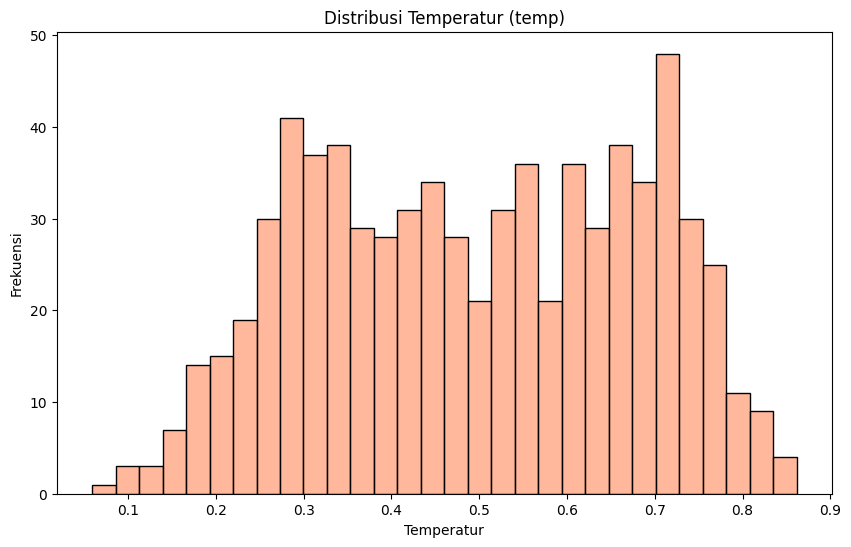

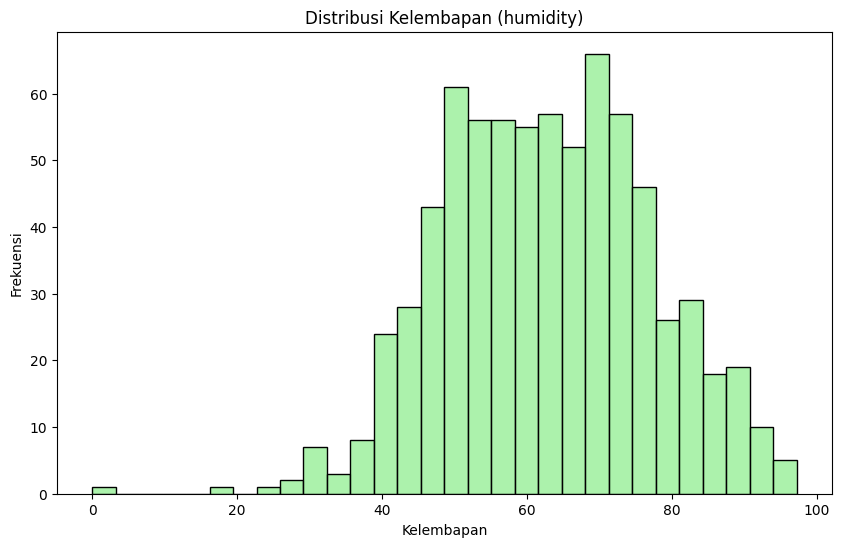

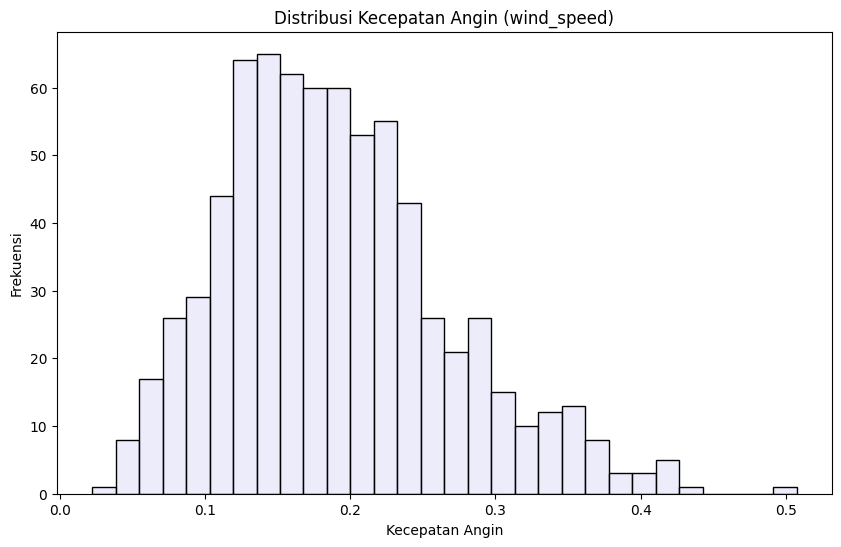

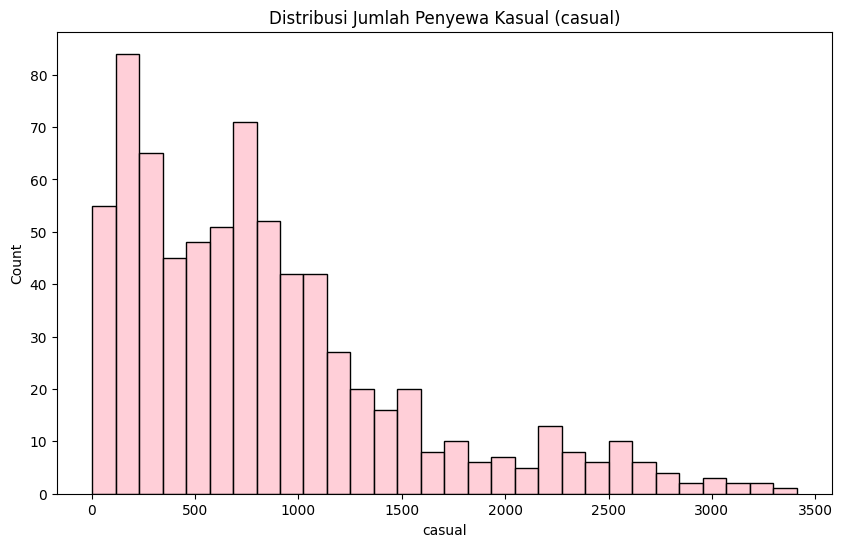

In [69]:
# Histogram untuk 'count_cr'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['count_cr'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Penyewaan Sepeda (count_cr)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'temp'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['temp'], bins=30, kde=False, color='lightsalmon', edgecolor='black')
plt.title('Distribusi Temperatur (temp)')
plt.xlabel('Temperatur')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'humidity'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['humidity'], bins=30, kde=False, color='lightgreen', edgecolor='black')
plt.title('Distribusi Kelembapan (humidity)')
plt.xlabel('Kelembapan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'wind_speed'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['wind_speed'], bins=30, kde=False, color='lavender', edgecolor='black')
plt.title('Distribusi Kecepatan Angin (wind_speed)')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk 'casual'
plt.figure(figsize=(10, 6))
sns.histplot(day_df['casual'], bins=30, kde=False, color='pink', edgecolor='black')
plt.title('Distribusi Jumlah Penyewa Kasual (casual)')
plt.show()

## Conclusion

- Conclution Pertanyaan 1: Jam Puncak dan Sepi Penyewaan Sepeda : Analisis data menunjukkan bahwa aktivitas penyewaan sepeda mencapai puncaknya pada sore hari pukul 17.00. Di sisi lain, dini hari pukul 04.00 menjadi periode dengan aktivitas penyewaan yang paling minim.
-Conclution pertanyaan 2:  Perkembangan Bisnis Penyewaan Sepeda dari Tahun ke Tahun: Grafik menunjukkan fluktuasi yang cukup signifikan dalam jumlah pesanan sepeda dari tahun ke tahun, dengan puncak tertinggi terjadi pada bulan September 2012 dan penurunan terendah pada bulan Januari 2011.
-Conclution pertanyaan 3: Sebagian besar pengguna layanan berbagi sepeda adalah pengguna terdaftar (registered riders) yang mencapai 81.2% dari total penggunaan, menunjukkan bahwa mayoritas pengguna lebih memilih untuk mendaftar sebelum menggunakan layanan. Sementara itu, hanya 18.8% pengguna yang termasuk dalam kategori casual riders, atau mereka yang belum mendaftar.

"Berdasarkan  analisis data penyewaan sepeda menunjukkan bahwa jam sibuk penyewaan terjadi pada pukul 17.00, sedangkan jam sepi pada pukul 04.00. Secara keseluruhan, terdapat fluktuasi jumlah penyewaan dari tahun ke tahun, dengan puncak tertinggi pada September 2012 dan titik terendah pada Januari 2011. Selain itu, sebagian besar pengguna adalah pelanggan terdaftar (registered riders), yang mencakup 81.2% dari total penyewaan, sementara 18.8% sisanya adalah penyewa kasual yang belum terdaftar."







